In [1]:
import requests
import pandas as pd
import json

response = requests.get('https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,EMP,PAYANN,STATE,RCPPDEMP,FIRMPDEMP&for=us:*&NAICS2017=00&key=87c4115b0cdb343f8c7024f14a2a10617c0a2b1b')

data = response.json()
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,EMPSZFI,EMPSZFI_LABEL,YEAR,EMP,PAYANN,STATE,RCPPDEMP,FIRMPDEMP,NAICS2017,us
0,United States,0100000US,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,001,All firms,2018,722654,21975675,None,91103725,84496,00,1
1,United States,0100000US,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,611,Firms with no employees,2018,0,499996,None,3233978,10036,00,1
2,United States,0100000US,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,612,Firms with 1 to 4 employees,2018,92631,2808773,None,15792524,47105,00,1
3,United States,0100000US,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,620,Firms with 5 to 9 employees,2018,83449,2601817,None,10688294,12523,00,1
4,United States,0100000US,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,630,Firms with 10 to 19 employees,2018,116479,3506384,None,14105603,8516,00,1


In [2]:
df = df[['SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','FIRMPDEMP','EMPSZFI_LABEL','EMP','PAYANN','RCPPDEMP','NAICS2017_LABEL']]
df.head()

,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,FIRMPDEMP,EMPSZFI_LABEL,EMP,PAYANN,RCPPDEMP,NAICS2017_LABEL
0,Female,Hispanic,Total,Total,84496,All firms,722654,21975675,91103725,Total for all sectors
1,Female,Hispanic,Total,Total,10036,Firms with no employees,0,499996,3233978,Total for all sectors
2,Female,Hispanic,Total,Total,47105,Firms with 1 to 4 employees,92631,2808773,15792524,Total for all sectors
3,Female,Hispanic,Total,Total,12523,Firms with 5 to 9 employees,83449,2601817,10688294,Total for all sectors
4,Female,Hispanic,Total,Total,8516,Firms with 10 to 19 employees,116479,3506384,14105603,Total for all sectors


In [3]:
#df.rename(columns = {'NAME':'Name'}, inplace = True)
df.rename(columns = {'SEX_LABEL':'Sex'}, inplace = True)
df.rename(columns = {'ETH_GROUP_LABEL':'Ethnicity'}, inplace = True)
df.rename(columns = {'RACE_GROUP_LABEL':'Race'}, inplace = True)
df.rename(columns = {'VET_GROUP_LABEL':'Vet Status'}, inplace = True)
df.rename(columns = {'FIRMPDEMP':'Number of Firms'}, inplace = True)
df.rename(columns = {'EMPSZFI_LABEL':'Firm Size'}, inplace = True)
df.rename(columns = {'PAYANN':'Payroll'}, inplace = True)
df.rename(columns = {'EMP':'Number of Employees'}, inplace = True)
df.rename(columns = {'RCPPDEMP':'Revenue'}, inplace = True)
df['Payroll'] = df['Payroll'].astype('int64')
df.head()

,Sex,Ethnicity,Race,Vet Status,Number of Firms,Firm Size,Number of Employees,Payroll,Revenue,NAICS2017_LABEL
0,Female,Hispanic,Total,Total,84496,All firms,722654,21975675,91103725,Total for all sectors
1,Female,Hispanic,Total,Total,10036,Firms with no employees,0,499996,3233978,Total for all sectors
2,Female,Hispanic,Total,Total,47105,Firms with 1 to 4 employees,92631,2808773,15792524,Total for all sectors
3,Female,Hispanic,Total,Total,12523,Firms with 5 to 9 employees,83449,2601817,10688294,Total for all sectors
4,Female,Hispanic,Total,Total,8516,Firms with 10 to 19 employees,116479,3506384,14105603,Total for all sectors


In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy
%matplotlib inline

In [5]:
response2 = requests.get('https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,FACTORS_P,FACTORS_P_LABEL,FACTORS_U,FACTORS_U_LABEL,IMPACTWF_P,IMPACTWF_P_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL,MOTPRODTECH,MOTPRODTECH_LABEL,MOTUSETECH,MOTUSETECH_LABEL,TECHSELL,TECHSELL_LABEL,TECHUSE,TECHUSE_LABEL,YEAR,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*&key=87c4115b0cdb343f8c7024f14a2a10617c0a2b1b')
data2 = response2.json()
df2 = pd.DataFrame(data2[1:], columns=data2[0])
df2.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,FACTORS_P,FACTORS_P_LABEL,FACTORS_U,FACTORS_U_LABEL,IMPACTWF_P,IMPACTWF_P_LABEL,...,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,us
0,0100000US,United States,00,Total for all sectors,T2E36R08,Cloud-Based: Lacked access to capital,00,All firms,00,All firms,...,None,4.8,None,1.3,None,3.9,None,2.9,None,1
1,0100000US,United States,00,Total for all sectors,T2E36R09,Cloud-Based: Technology not applicable to this...,00,All firms,00,All firms,...,None,0.7,None,8.4,None,0.8,None,13.4,None,1
2,0100000US,United States,00,Total for all sectors,T2E36R10,Cloud-Based: No factors adversely affected the...,00,All firms,00,All firms,...,None,0.9,None,2.8,None,0.8,None,4.3,None,1
3,0100000US,United States,00,Total for all sectors,T2E36R99,Cloud-Based: Total Reporting,00,All firms,00,All firms,...,None,0.5,None,0.0,None,0.4,None,0.0,None,1
4,0100000US,United States,00,Total for all sectors,T3E36R01,Specialized Software: Technology was too expen...,00,All firms,00,All firms,...,None,2.0,None,1.6,None,1.7,None,4.1,None,1


In [6]:
df2 = df2[['NAICS2017_LABEL','FACTORS_P_LABEL','FACTORS_U_LABEL','IMPACTWF_P_LABEL','IMPACTWF_U_LABEL','MOTPRODTECH_LABEL','MOTUSETECH_LABEL','TECHSELL_LABEL','TECHUSE_LABEL']]
df2.head()

,NAICS2017_LABEL,FACTORS_P_LABEL,FACTORS_U_LABEL,IMPACTWF_P_LABEL,IMPACTWF_U_LABEL,MOTPRODTECH_LABEL,MOTUSETECH_LABEL,TECHSELL_LABEL,TECHUSE_LABEL
0,Total for all sectors,Cloud-Based: Lacked access to capital,All firms,All firms,All firms,All firms,All firms,All firms,All firms
1,Total for all sectors,Cloud-Based: Technology not applicable to this...,All firms,All firms,All firms,All firms,All firms,All firms,All firms
2,Total for all sectors,Cloud-Based: No factors adversely affected the...,All firms,All firms,All firms,All firms,All firms,All firms,All firms
3,Total for all sectors,Cloud-Based: Total Reporting,All firms,All firms,All firms,All firms,All firms,All firms,All firms
4,Total for all sectors,Specialized Software: Technology was too expen...,All firms,All firms,All firms,All firms,All firms,All firms,All firms


In [7]:
merged = pd.merge(left=df, right=df2, right_index=True, left_index=True,how='inner')
merged

,Sex,Ethnicity,Race,Vet Status,Number of Firms,Firm Size,Number of Employees,Payroll,Revenue,NAICS2017_LABEL_x,NAICS2017_LABEL_y,FACTORS_P_LABEL,FACTORS_U_LABEL,IMPACTWF_P_LABEL,IMPACTWF_U_LABEL,MOTPRODTECH_LABEL,MOTUSETECH_LABEL,TECHSELL_LABEL,TECHUSE_LABEL
0,Female,Hispanic,Total,Total,84496,All firms,722654,21975675,91103725,Total for all sectors,Total for all sectors,Cloud-Based: Lacked access to capital,All firms,All firms,All firms,All firms,All firms,All firms,All firms
1,Female,Hispanic,Total,Total,10036,Firms with no employees,0,499996,3233978,Total for all sectors,Total for all sectors,Cloud-Based: Technology not applicable to this...,All firms,All firms,All firms,All firms,All firms,All firms,All firms
2,Female,Hispanic,Total,Total,47105,Firms with 1 to 4 employees,92631,2808773,15792524,Total for all sectors,Total for all sectors,Cloud-Based: No factors adversely affected the...,All firms,All firms,All firms,All firms,All firms,All firms,All firms
3,Female,Hispanic,Total,Total,12523,Firms with 5 to 9 employees,83449,2601817,10688294,Total for all sectors,Total for all sectors,Cloud-Based: Total Reporting,All firms,All firms,All firms,All firms,All firms,All firms,All firms
4,Female,Hispanic,Total,Total,8516,Firms with 10 to 19 employees,116479,3506384,14105603,Total for all sectors,Total for all sectors,Specialized Software: Technology was too expen...,All firms,All firms,All firms,All firms,All firms,All firms,All firms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Total,Total,Native Hawaiian and Other Pacific Islander,Nonveteran,0,Firms with 20 to 49 employees,0,0,0,Total for all sectors,Utilities,All firms,All firms,All firms,All firms,All firms,All firms,All firms,"Artificial Intelligence: Tested, but did not u..."
1172,Total,Total,Native Hawaiian and Other Pacific Islander,Nonveteran,0,Firms with 50 to 99 employees,0,0,0,Total for all sectors,Utilities,All firms,All firms,All firms,All firms,All firms,All firms,All firms,Artificial Intelligence: Low use
1173,Total,Total,Native Hawaiian and Other Pacific Islander,Nonveteran,0,Firms with 100 to 249 employees,0,0,0,Total for all sectors,Utilities,All firms,All firms,All firms,All firms,All firms,All firms,All firms,Artificial Intelligence: Moderate use
1174,Total,Total,Native Hawaiian and Other Pacific Islander,Nonveteran,2,Firms with 250 to 499 employees,952,45549,115285,Total for all sectors,Utilities,All firms,All firms,All firms,All firms,All firms,All firms,All firms,Artificial Intelligence: High use


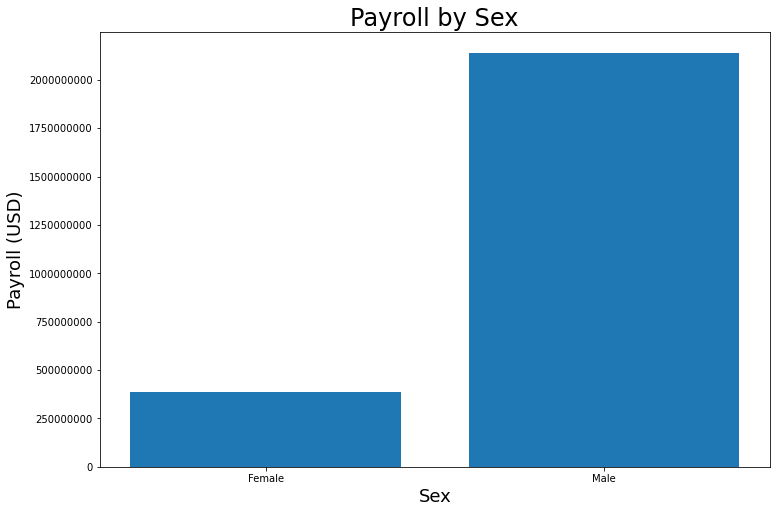

In [8]:
sexpayrollDF = df.loc[((df['Sex'] == 'Female') | (df['Sex'] == 'Male')) & (df['Firm Size'] == 'All firms') & (df['Ethnicity'] == 'Total') & (df['Race'] == 'Total') & (df['Vet Status'] == 'Total')]
jointPayrolls = sexpayrollDF['Sex']
payrollCol = sexpayrollDF['Payroll']
plt.figure(figsize=(12,8))
plt.bar(x=jointPayrolls, height=payrollCol)
plt.ylabel("Payroll (USD)",size=18)
plt.xlabel("Sex",size=18)
plt.title("Payroll by Sex",size=24)
plt.ticklabel_format(axis="y", useOffset=False, style='plain')

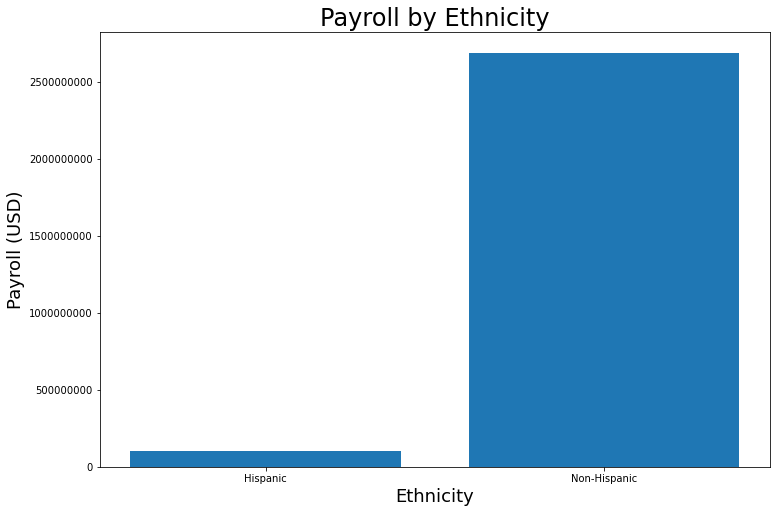

In [9]:
ethpayrollDF = df.loc[((df['Ethnicity'] == 'Non-Hispanic') | (df['Ethnicity'] == 'Hispanic')) & (df['Firm Size'] == 'All firms') & (df['Sex'] == 'Total') & (df['Race'] == 'Total') & (df['Vet Status'] == 'Total')]
ethjointPayrolls = ethpayrollDF['Ethnicity']
payrollCol = ethpayrollDF['Payroll']
plt.figure(figsize=(12,8))
plt.ylabel("Payroll (USD)",size=18)
plt.xlabel("Ethnicity",size=18)
plt.title("Payroll by Ethnicity",size=24)
plt.bar(x=ethjointPayrolls, height=payrollCol)
plt.ticklabel_format(axis="y", useOffset=False, style='plain')

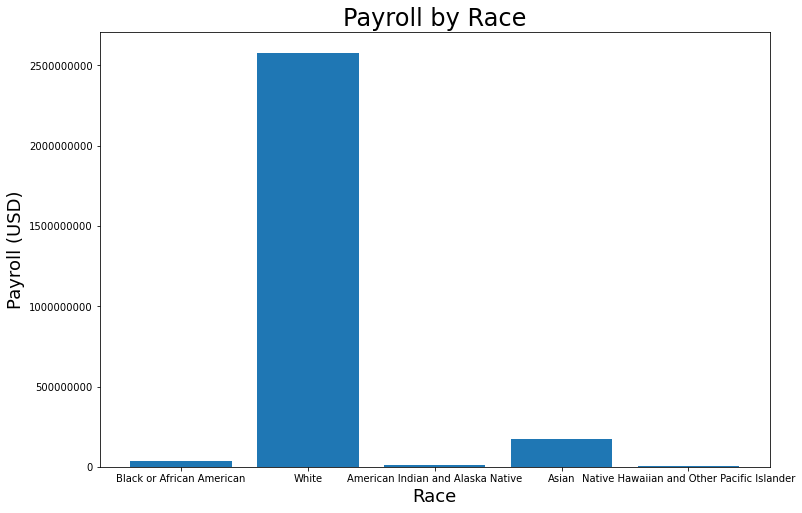

In [10]:
racepayrollDF = df.loc[((df['Race'] == 'White') | (df['Race'] == 'Black or African American') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian and Alaska Native') | (df['Race'] == 'Native Hawaiian and Other Pacific Islander')) & (df['Firm Size'] == 'All firms') & (df['Sex'] == 'Total') & (df['Ethnicity'] == 'Total') & (df['Vet Status'] == 'Total')]
racejointPayrolls = racepayrollDF['Race']
payrollCol = racepayrollDF['Payroll']
plt.figure(figsize=(12,8))
plt.ylabel("Payroll (USD)",size=18)
plt.xlabel("Race",size=18)
plt.title("Payroll by Race",size=24)
plt.bar(x=racejointPayrolls, height=payrollCol)
plt.ticklabel_format(axis="y", useOffset=False, style='plain')

In [11]:
merged['MOTUSETECH_LABEL'].value_counts()

All firms                                                                             1071
Artificial Intelligence: To automate tasks performed by labor                            3
Specialized Software: Some other reason                                                  3
Specialized Software: Total Reporting                                                    3
Robotics: To automate tasks performed by labor                                           3
Robotics: To upgrade outdated processes or methods                                       3
Robotics: To improve quality or reliability of processes or methods                      3
Robotics: To expand the range of goods or services                                       3
Robotics: To adopt standards and accreditation                                           3
Robotics: Some other reason                                                              3
Robotics: Total Reporting                                                                3

Text(0.5, 0, 'Firm Size')

<Figure size 720x432 with 0 Axes>

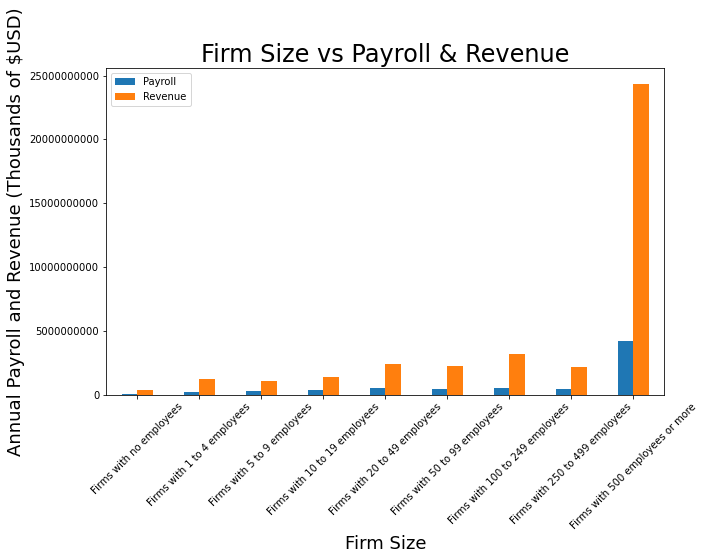

In [12]:
merged['Number of Employees'] = merged['Number of Employees'].astype(int)
merged['Payroll'] = merged['Payroll'].astype('int64')
merged['Revenue'] = merged['Revenue'].astype('int64')
merged['Number of Firms'] = merged['Number of Firms'].astype('int64')

x = merged.loc[(merged['Sex'] == 'Total') & (merged['Ethnicity'] == 'Total') & (merged['Race'] == 'Total') & (merged['Vet Status'] == 'Total')]
x = x[['Firm Size', 'Payroll', 'Revenue']]
x = x.loc[x['Firm Size']!='All firms'] 

#XTICK LIST
FirmSize = x['Firm Size']
FirmSize = FirmSize.tolist()

y= x[['Payroll', 'Revenue']]

a = []

for i in range(0,9):
    a.append(i)
    
plt.figure(figsize=(10,6))
y.plot.bar(xticks=a, figsize=(10,6),rot=45).set_xticks(a, FirmSize)
plt.title('Firm Size vs Payroll & Revenue', size = 24)
plt.ticklabel_format(axis='y', useOffset=False, style='plain') 
plt.ylabel('Annual Payroll and Revenue (Thousands of $USD)', size=18)
plt.xlabel('Firm Size', size = 18)

Text(0.5, 0, 'Firm Size')

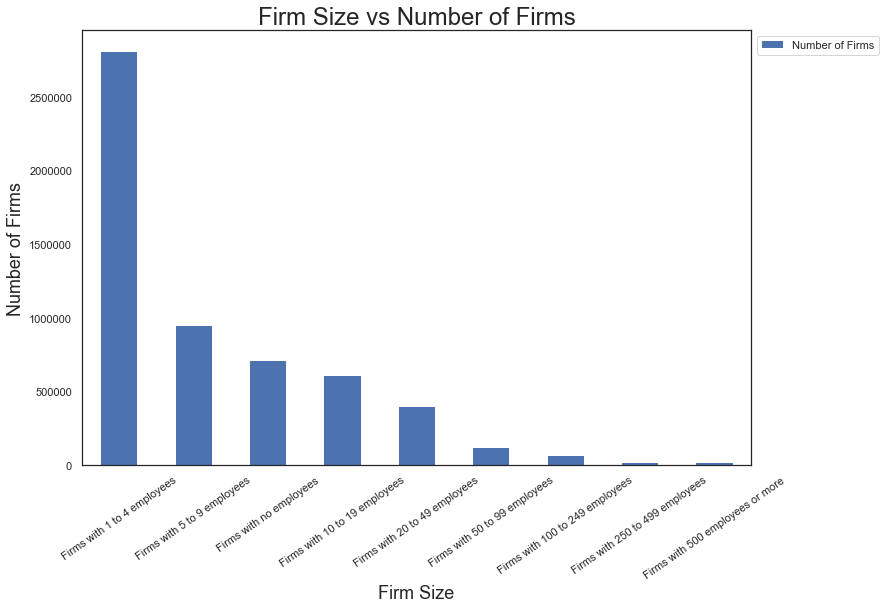

In [13]:
import seaborn as sns
vis5 = merged.loc[(merged['Sex'] == 'Total') & (merged['Ethnicity'] == 'Total') & (merged['Race'] == 'Total') & (merged['Vet Status'] == 'Total')]
vis5 = vis5[['Firm Size', 'Number of Firms']]
vis5 = vis5.loc[vis5['Firm Size']!='All firms']

vis5 = vis5.sort_values(by='Number of Firms',ascending =False)

sns.set(rc={'figure.figsize':(12,8)})

sns.set_theme(style="white")
ax = vis5.plot(x='Firm Size', y='Number of Firms', kind='bar')
plt.legend(bbox_to_anchor=(1,1), 
           loc="upper left"
          )

ax.set_xlabel('Firm Size')
plt.xticks(rotation=35);
plt.title('Firm Size vs Number of Firms', size = 24)
plt.ticklabel_format(axis='y', useOffset=False, style='plain') 
plt.ylabel('Number of Firms', size=18)
plt.xlabel('Firm Size', size = 18)

Text(0.5, 0, 'Sex')

<Figure size 864x576 with 0 Axes>

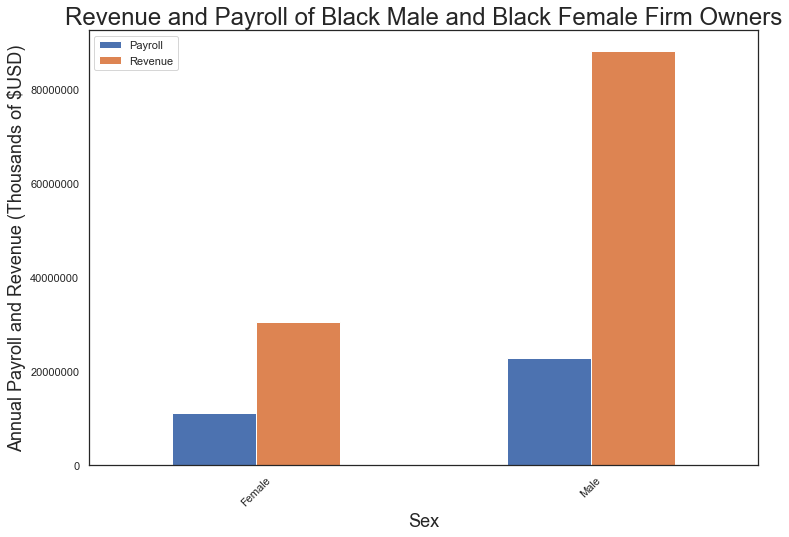

In [14]:
vis6 = merged.loc[(merged['Race'] == 'Black or African American') & (merged['Ethnicity'] == 'Total') & (merged['Vet Status'] == 'Total') & (merged['Firm Size'] == 'All firms')]
vis6 = vis6.loc[(vis6['Sex'] == 'Female') | (merged['Sex'] == 'Male')]
vis6 = vis6[['Sex', 'Payroll', 'Revenue']]

vis6.shape
vis6y = vis6[['Payroll', 'Revenue']]
vis6x = vis6['Sex']
vis6x = vis6x.tolist()
b = []

for i in range(0,2):
    b.append(i)
    
plt.figure(figsize=(12,8))
vis6y.plot.bar(xticks=b, figsize=(12,8),rot=45).set_xticks(b, vis6x) 
plt.title('Revenue and Payroll of Black Male and Black Female Firm Owners', size=24)
plt.ticklabel_format(axis='y', useOffset=False, style='plain') 
plt.ylabel('Annual Payroll and Revenue (Thousands of $USD)', size=18)
plt.xlabel('Sex', size = 18)

Text(0.5, 0, 'Sex')

<Figure size 864x576 with 0 Axes>

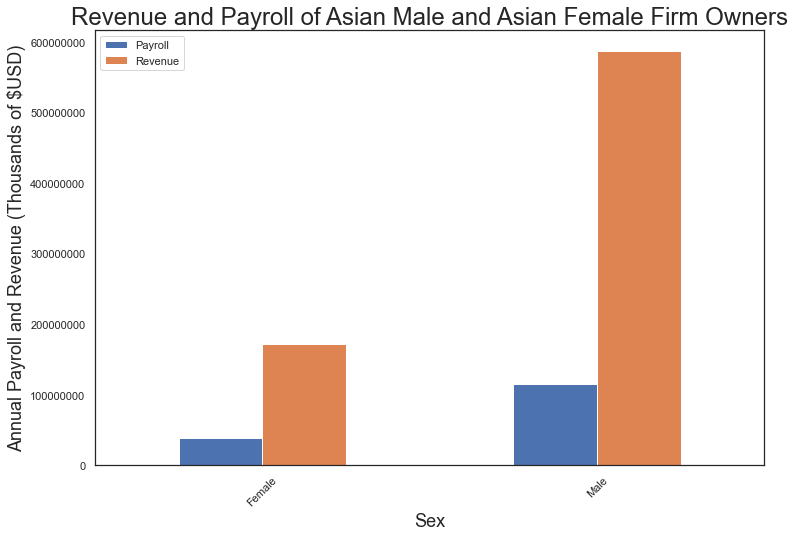

In [15]:
vis12 = merged.loc[(merged['Race'] == 'Asian') & (merged['Ethnicity'] == 'Total') & (merged['Vet Status'] == 'Total') & (merged['Firm Size'] == 'All firms')]
vis12 = vis12.loc[(vis12['Sex'] == 'Female') | (vis12['Sex'] == 'Male')]
vis12 = vis12[['Sex', 'Payroll', 'Revenue']]

vis12.shape

vis12y = vis12[['Payroll', 'Revenue']]
vis12x = vis12['Sex']
vis12x = vis12x.tolist()

b = []

for i in range(0,2):
    b.append(i)
    
plt.figure(figsize=(12,8))
vis12y.plot.bar(xticks=b, figsize=(12,8),rot=45).set_xticks(b, vis12x) 
plt.title('Revenue and Payroll of Asian Male and Asian Female Firm Owners', size=24)
plt.ticklabel_format(axis='y', useOffset=False, style='plain') 
plt.ylabel('Annual Payroll and Revenue (Thousands of $USD)', size=18)
plt.xlabel('Sex', size = 18)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


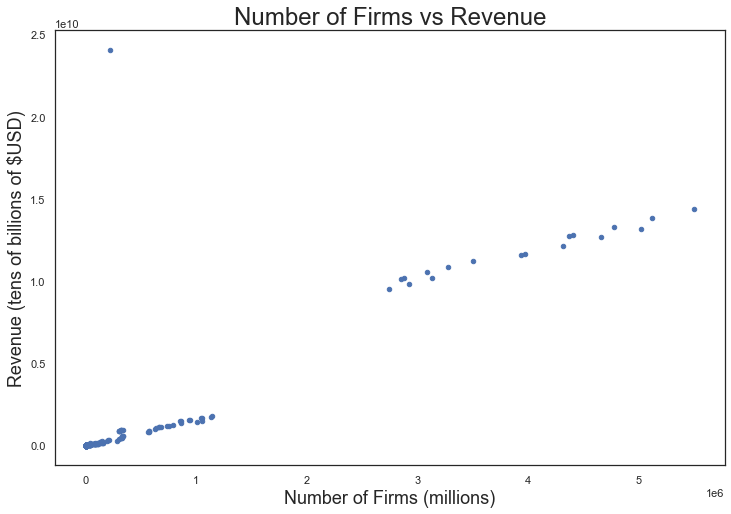

In [16]:
f = merged.loc[(merged['Firm Size'] == 'All firms') & (merged['Number of Firms'] > 0) & (merged['Number of Firms'] < 5722142)]
f
#revenue vs number of firms scatter plot
f.plot.scatter(x='Number of Firms', y='Revenue', figsize=(12,8))
plt.ylabel('Revenue (tens of billions of $USD)' ,size=18)
plt.xlabel("Number of Firms (millions)",size=18)
plt.title("Number of Firms vs Revenue",size=24)
plt.show()

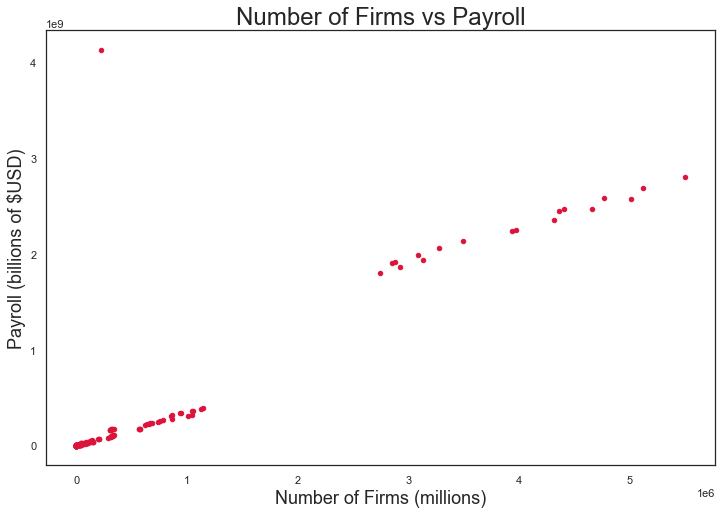

In [17]:
f.plot.scatter(x='Number of Firms', y='Payroll', color='#DC143C', figsize=(12,8))
plt.ylabel("Payroll (billions of $USD)",size=18)
plt.xlabel("Number of Firms (millions)",size=18)
plt.title("Number of Firms vs Payroll",size=24)
plt.show()

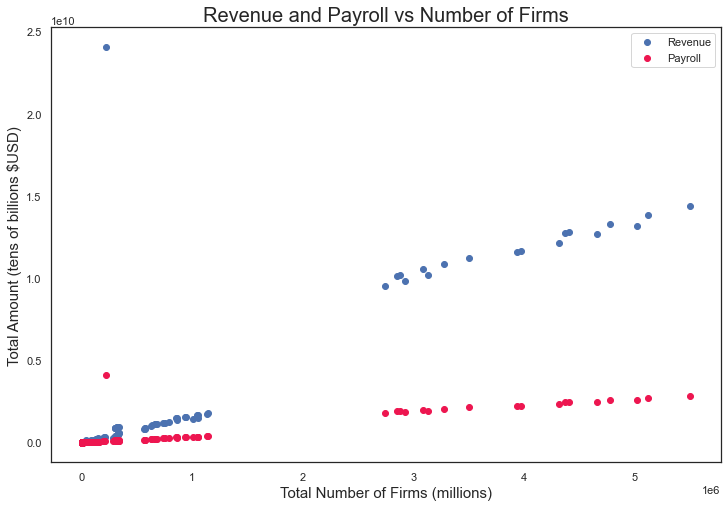

In [23]:
revenue_data = f[['Revenue']]
payroll_data = f[['Payroll']]
number_firms = f[['Number of Firms']]

plt.figure(figsize=(12,8))
plt.scatter(number_firms,revenue_data,label='Revenue')
plt.scatter(number_firms,payroll_data, c='#ed1650',label='Payroll')
plt.title('Revenue and Payroll vs Number of Firms', size=20)
plt.xlabel('Total Number of Firms (millions)', size=15)
plt.ylabel('Total Amount (tens of billions $USD)', size=15)
plt.legend(loc=1)
plt.show()

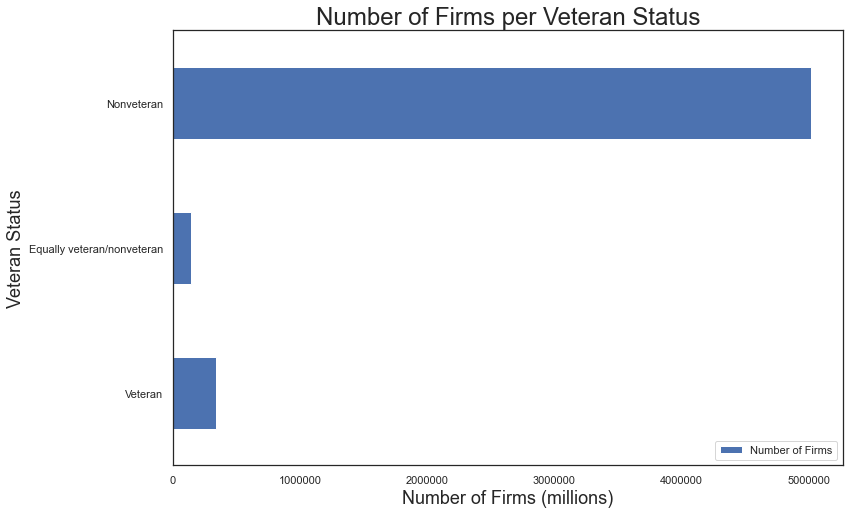

In [19]:
vet_filtered = merged.loc[(merged['Sex'] == 'Total') & (merged['Race'] == 'Total') & (merged['Ethnicity'] == 'Total') & (merged['Firm Size'] == 'All firms') & (merged['Vet Status'] != 'Total')]
vet_filtered = vet_filtered[['Vet Status', 'Number of Firms', 'Firm Size']]
vet_filtered
g = vet_filtered.plot(kind='barh',x='Vet Status', figsize=(12,8))
g.set_title('Number of Firms per Veteran Status', size=24)
g.set_xlabel('Number of Firms (millions)', size=18)
g.set_ylabel('Veteran Status', size = 18)
g.legend(loc=4)
g.ticklabel_format(axis='x', useOffset = False, style='plain')

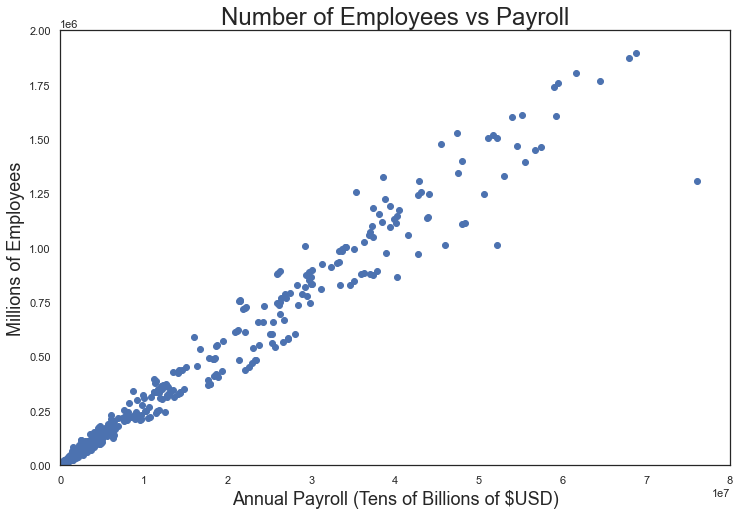

In [20]:
## For number of employees and payroll

sns.set_theme(style="white")

merged['Number of Employees'] = merged['Number of Employees'].astype(int)
merged['Payroll'] = merged['Payroll'].astype('int64')

gdata = merged.loc[(merged["Number of Employees"] != 0) & (merged["Firm Size"] != "All firms")]

np_scatter = gdata[["Number of Employees","Payroll"]]
number = np_scatter["Number of Employees"]
payroll = np_scatter["Payroll"]

plt.figure(figsize=(12,8))
plt.scatter(x = payroll, y = number)
plt.ylabel("Millions of Employees",size=18)
plt.xlabel("Annual Payroll (Tens of Billions of $USD)",size=18)
plt.title("Number of Employees vs Payroll",size=24)
plt.xlim((0,80000000))
plt.ylim((0,2000000));

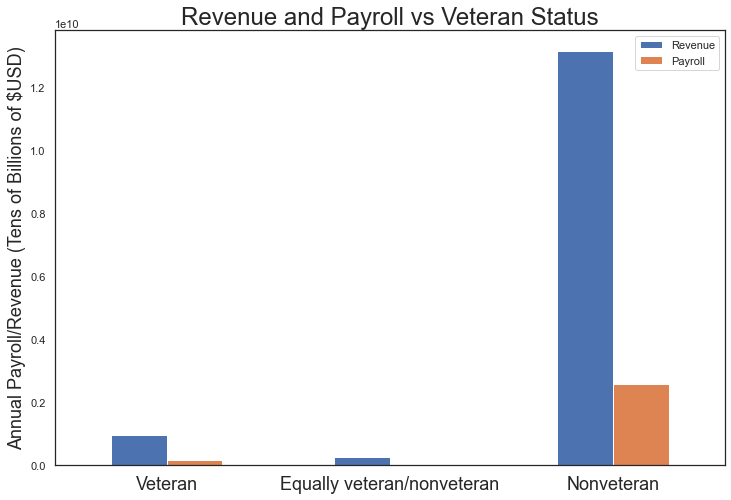

In [21]:
## For revenue and payroll vs veteran status

sns.set_theme(style="white")

merged['Revenue'] = merged['Revenue'].astype('int64')

gdata1 = merged.loc[(merged["Firm Size"] == "All firms") & (merged["Vet Status"] != "Total") & (merged["Sex"] == "Total") 
                   & (merged["Ethnicity"] == "Total") & (merged["Race"] == "Total")]
vpr = gdata1[["Vet Status","Revenue","Payroll"]]


vpr.plot.bar(x="Vet Status",figsize=(12,8),xlabel="",rot = 0)
plt.title("Revenue and Payroll vs Veteran Status",size=24)
plt.xticks(size=18)
plt.ylabel("Annual Payroll/Revenue (Tens of Billions of $USD)",size=18);